<h3>Step 1: Import libraries</h3>

In [19]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
import os

warnings.filterwarnings('ignore')

<h3>Step 2: Import data</h3>

In [20]:
# Read dataset
train_data_path = os.path.abspath('../datasets/train_data.csv')
test_data_path = os.path.abspath('../datasets/testing_data.csv')
val_data_path = os.path.abspath('../datasets/val_data.csv')

# merging two csv files
dataframe = pd.concat(map(pd.read_csv, [train_data_path, test_data_path, val_data_path]), ignore_index=True)

dataframe.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class,Unnamed: 14
0,Bengaluru,BENGR_Good_2023-02-26-08.30-1-236.jpg,2023,2,26,8:30,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good,NaN
1,Tamil Nadu,TN_Good_2023-02-22-09.30-1-221.jpg,2023,2,22,9:30,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good,NaN
2,Bengaluru,BENGR_Good_2023-02-28-08.30-1-131.jpg,2023,2,28,8:30,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good,NaN
3,Bengaluru,BENGR_Good_2023-02-28-08.30-1-156.jpg,2023,2,28,8:30,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good,NaN
4,Bengaluru,BENGR_Good_2023-02-27-08.30-1-471.jpg,2023,2,27,8:30,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good,NaN


<h3>Step 3: Data Analysis / Preprocessing</h3>

EDA typically involves several key steps, including:

- Data cleaning and preparation involve removing missing or incorrect values, transforming variables, and handling outliers.
- Data visualization is the process of creating graphs, charts, and other visual representations of the data to help identify patterns, relationships, and anomalies.
- Statistical analysis involves applying mathematical and statistical methods to the data to identify important features and relationships.

<b>Get required data</b>

We don’t need the Filename column so we can drop it.

In [21]:
# Get required data
dataframe.drop(columns = ['Filename'], inplace=True)
dataframe.drop(columns = ['Unnamed: 14'], inplace=True)
dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,2023,2,26,8:30,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,Tamil Nadu,2023,2,22,9:30,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,Bengaluru,2023,2,28,8:30,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,Bengaluru,2023,2,28,8:30,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,Bengaluru,2023,2,27,8:30,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


<b>Describe data</b>

Get statistical description of data using Pandas describe() function. It shows us the count, mean, standard deviation, and range of data.

In [22]:
# Describe data
dataframe.describe()

,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2
count,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,11937.000000,11658.000000,10756.000000,11802.000000
mean,2022.947631,2.686029,12.118709,167.644281,143.057837,145.679164,39.494873,101.266348,13.235527,37.855719
std,0.222780,1.774353,8.271343,102.846875,130.798917,104.545140,33.341474,115.970471,9.843120,39.560866
min,2022.000000,2.000000,1.000000,15.000000,4.000000,7.000000,1.000000,0.000000,2.000000,0.670000
25%,2023.000000,2.000000,3.000000,97.000000,35.000000,64.000000,13.000000,4.000000,4.400000,7.000000
50%,2023.000000,2.000000,13.000000,152.000000,70.080000,113.000000,31.000000,52.000000,10.000000,20.000000
75%,2023.000000,3.000000,20.000000,230.000000,257.000000,198.000000,59.660000,174.000000,20.000000,64.000000
max,2023.000000,10.000000,28.000000,450.000000,500.000000,480.000000,225.000000,410.000000,57.000000,169.000000


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   12240 non-null  object 
 1   Year       12240 non-null  int64  
 2   Month      12240 non-null  int64  
 3   Day        12240 non-null  int64  
 4   Hour       12240 non-null  object 
 5   AQI        12240 non-null  int64  
 6   PM2.5      12240 non-null  float64
 7   PM10       12240 non-null  float64
 8   O3         11937 non-null  float64
 9   CO         11658 non-null  float64
 10  SO2        10756 non-null  float64
 11  NO2        11802 non-null  float64
 12  AQI_Class  12240 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 1.2+ MB


<b>Distribution of data</b>

Check data distribution.

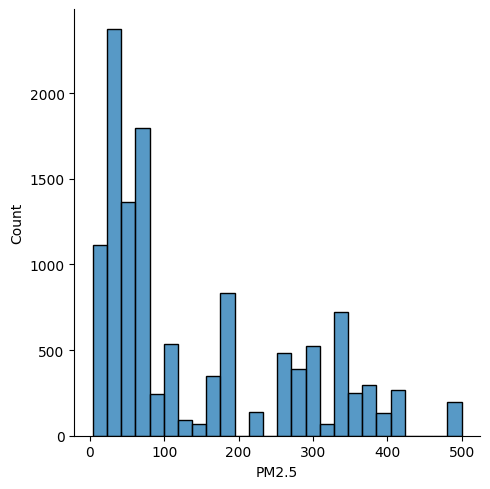

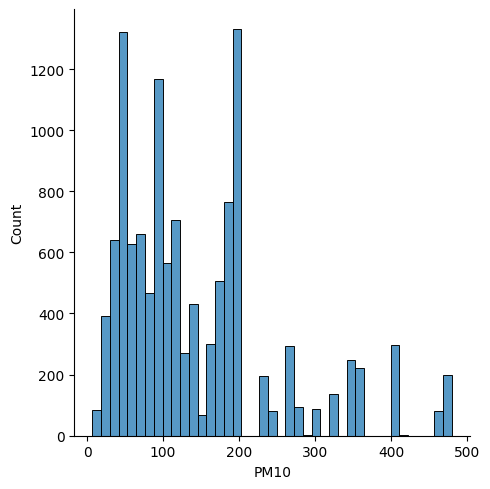

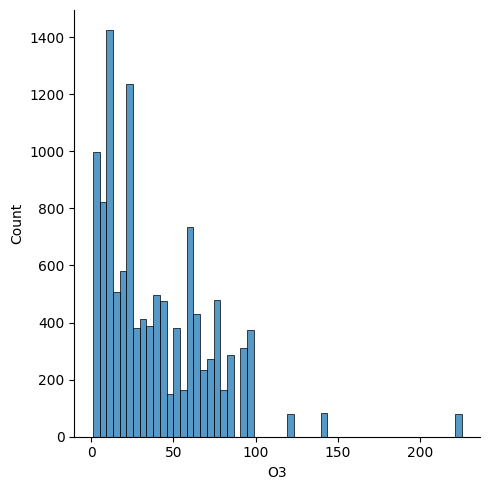

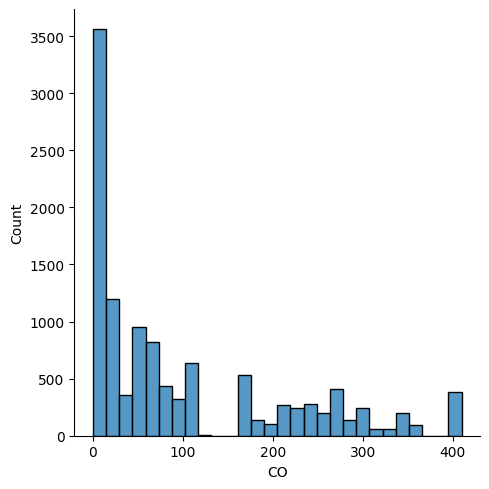

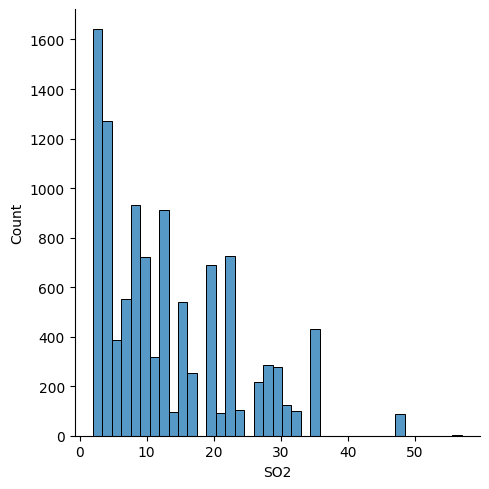

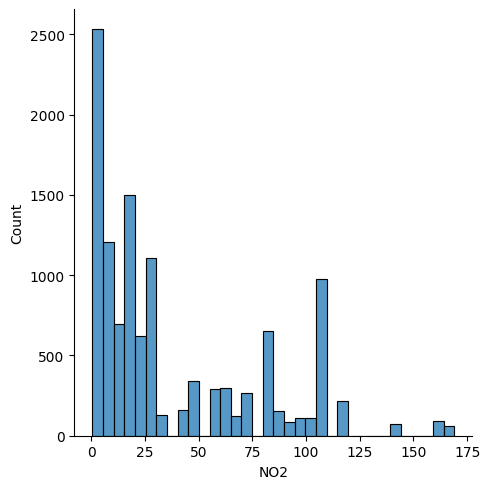

In [24]:
# distribution
sns.displot(dataframe['PM2.5'])
sns.displot(dataframe['PM10'])
sns.displot(dataframe['O3'])
sns.displot(dataframe['CO'])
sns.displot(dataframe['SO2'])
sns.displot(dataframe['NO2'])

<b>Label encoding</b>

Label encoding is a preprocessing technique in machine learning and data analysis where categorical data is converted into numerical values, to make it compatible with mathematical operations and models.

In [25]:
# Label encoding
le = LabelEncoder()
dataframe['Location'] = le.fit_transform(dataframe['Location'])
dataframe['Hour'] = le.fit_transform(dataframe['Hour'])

dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,2023,2,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,2023,2,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,2023,2,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


<b>Correlation matrix</b>

A correlation matrix is a table that summarizes the relationship between multiple variables in a dataset. It shows the correlation coefficients between each pair of variables, which indicate the strength and direction of the relationship between the variables. It is useful for identifying highly correlated variables and selecting a subset of variables for further analysis.

The correlation coefficient can range from -1 to 1, where:

- A correlation coefficient of -1 indicates a strong negative relationship between two variables
- A correlation coefficient of 0 indicates no relationship between two variables
- A correlation coefficient of 1 indicates a strong positive relationship between two variables

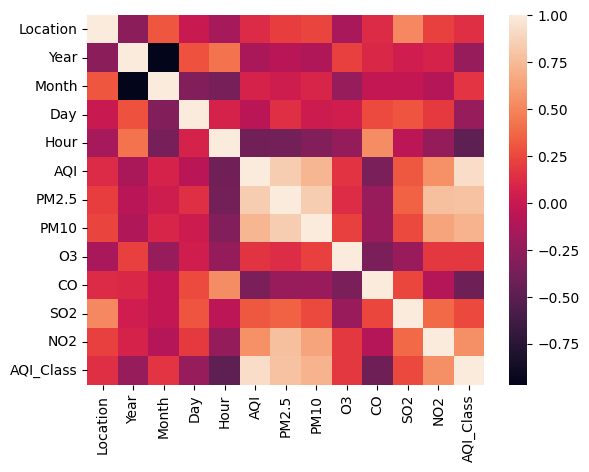

In [26]:
# Correlation matrix
corrMatrixDF = dataframe.copy(deep=True)
corrMatrixDF['AQI_Class'] = le.fit_transform(corrMatrixDF['AQI_Class'])
sns.heatmap(corrMatrixDF.corr())
del(corrMatrixDF)

In [27]:
# Review missing data
print(dataframe.isnull().sum())

Location        0
Year            0
Month           0
Day             0
Hour            0
AQI             0
PM2.5           0
PM10            0
O3            303
CO            582
SO2          1484
NO2           438
AQI_Class       0
dtype: int64


In [28]:
# Eliminate rows with at least three missing values
dataframe = dataframe.dropna(thresh=3)
dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,2023,2,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,2023,2,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,2023,2,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


In [29]:
# Review rows with remaining missing values
missing_O3_indices = [i for i,v in enumerate(dataframe['O3'].isnull()) if v==True]
missing_CO_indices = [i for i,v in enumerate(dataframe['CO'].isnull()) if v==True]
missing_SO2_indices = [i for i,v in enumerate(dataframe['SO2'].isnull()) if v==True]
missing_NO2_indices = [i for i,v in enumerate(dataframe['NO2'].isnull()) if v==True]
all_missing_indices = list(set(missing_O3_indices + missing_CO_indices + missing_SO2_indices + missing_NO2_indices))
print("Number of all missing data is", len(all_missing_indices))
missingData = dataframe.iloc[all_missing_indices]

Number of all missing data is 1629


In [30]:
# Inpute missing values for SO2 based on the mean of similar rows
for index, row in missingData.iterrows():
    o3 = row[8]
    co = row[9]
    so2 = row[10]
    no2 = row[11]
    if math.isnan(row[8]): dataframe.at[index, 'O3'] = dataframe.loc[:, 'O3'].mean()
    if math.isnan(row[9]): dataframe.at[index, 'CO'] = dataframe.loc[:, 'CO'].mean()
    if math.isnan(row[10]): dataframe.at[index, 'SO2'] = dataframe.loc[:, 'SO2'].mean()
    if math.isnan(row[11]): dataframe.at[index, 'NO2'] = dataframe.loc[:, 'NO2'].mean()

# Review missing data
print(dataframe.isnull().sum())

Location     0
Year         0
Month        0
Day          0
Hour         0
AQI          0
PM2.5        0
PM10         0
O3           0
CO           0
SO2          0
NO2          0
AQI_Class    0
dtype: int64


<b>Z-score Statistical Measure</b>

Z-scores transform datasets with a mean of 0 and a standard deviation of 1. As a result, it's possible to compare datasets sourced from different scales and units.

Z-score emissions:
 Empty DataFrame
Columns: [Location, Year, Month, Day, Hour, AQI, PM2.5, PM10, O3, CO, SO2, NO2, AQI_Class, z_score]
Index: []


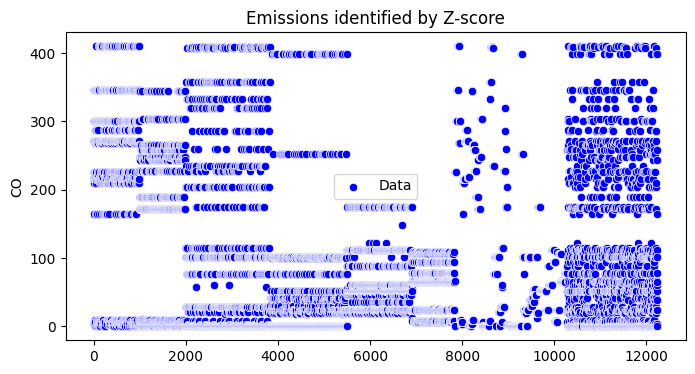

In [31]:
zScoreDF = dataframe.copy(deep=True)
zScoreDF['z_score'] = (zScoreDF['CO'] - zScoreDF['CO'].mean()) / zScoreDF['CO'].std()

# Selection of new (by rule: Z-score > 3)
outliers = zScoreDF[np.abs(zScoreDF['z_score']) > 3]
print("Z-score emissions:\n", outliers)

# Visualization 
plt.figure(figsize=(8, 4))
sns.scatterplot(x=range(len(zScoreDF)), y=zScoreDF['CO'], color='blue', label="Data")
sns.scatterplot(x=outliers.index, y=outliers['CO'], color='red', label="Outliers")
plt.title("Emissions identified by Z-score")
plt.legend()
plt.show()

del(zScoreDF)

<b>Emissions index for all values</b>

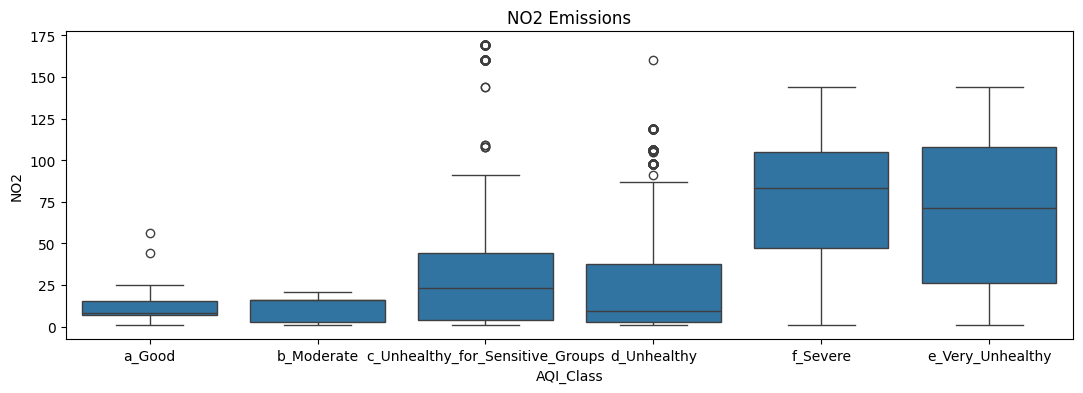

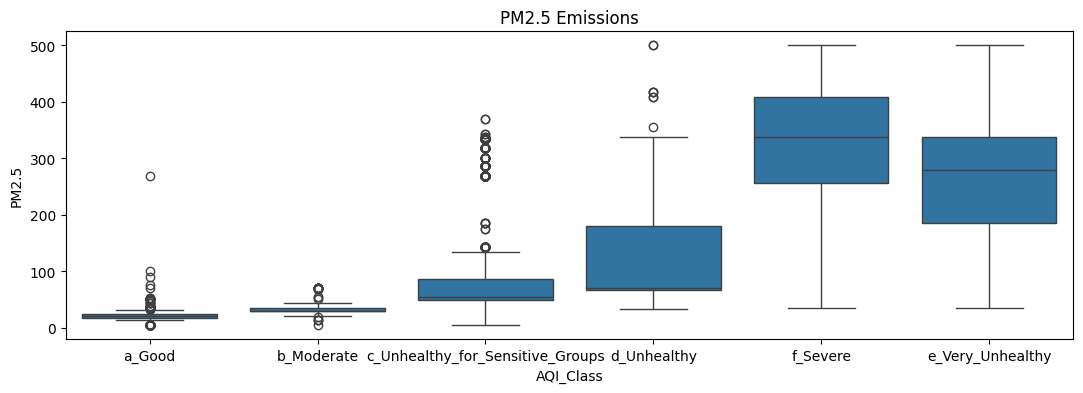

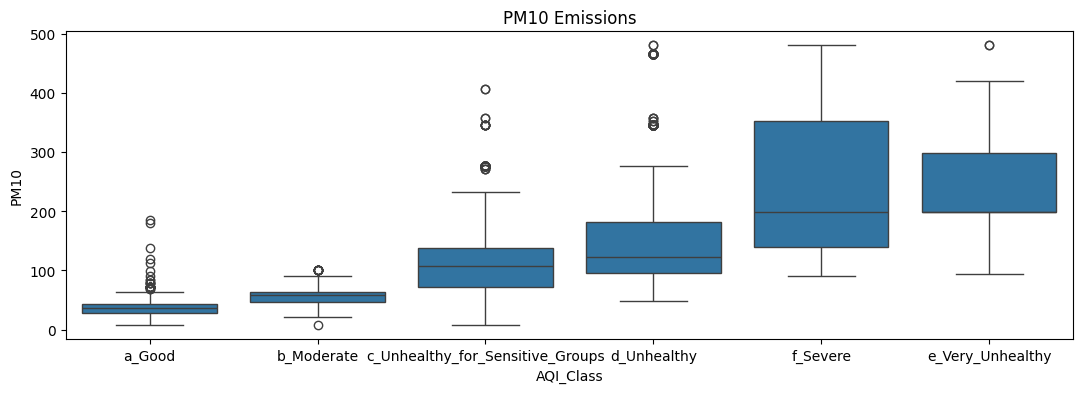

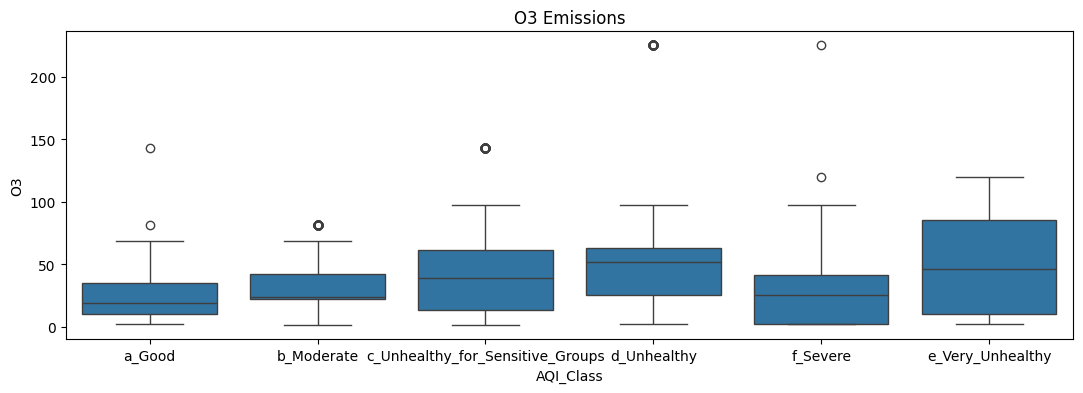

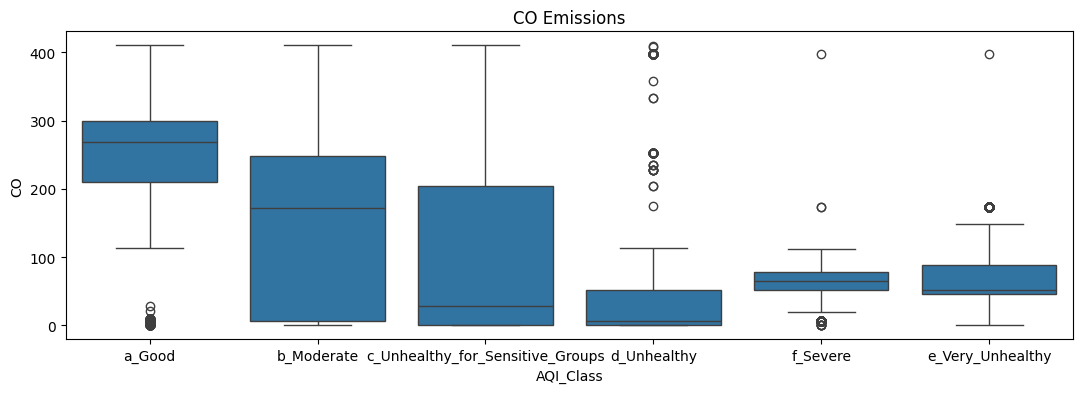

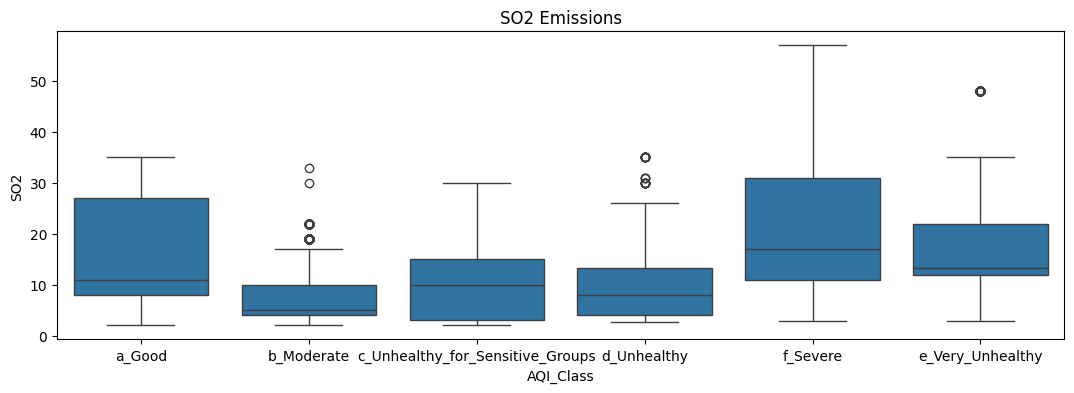

In [32]:
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="NO2")
plt.title("NO2 Emissions")
plt.show()
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="PM2.5")
plt.title("PM2.5 Emissions")
plt.show()
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="PM10")
plt.title("PM10 Emissions")
plt.show()
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="O3")
plt.title("O3 Emissions")
plt.show()
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="CO")
plt.title("CO Emissions")
plt.show()
plt.figure(figsize=(13, 4))
sns.boxplot(data=dataframe, x="AQI_Class", y="SO2")
plt.title("SO2 Emissions")
plt.show()

<b>Pairplot</b>

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationships in a data-set.

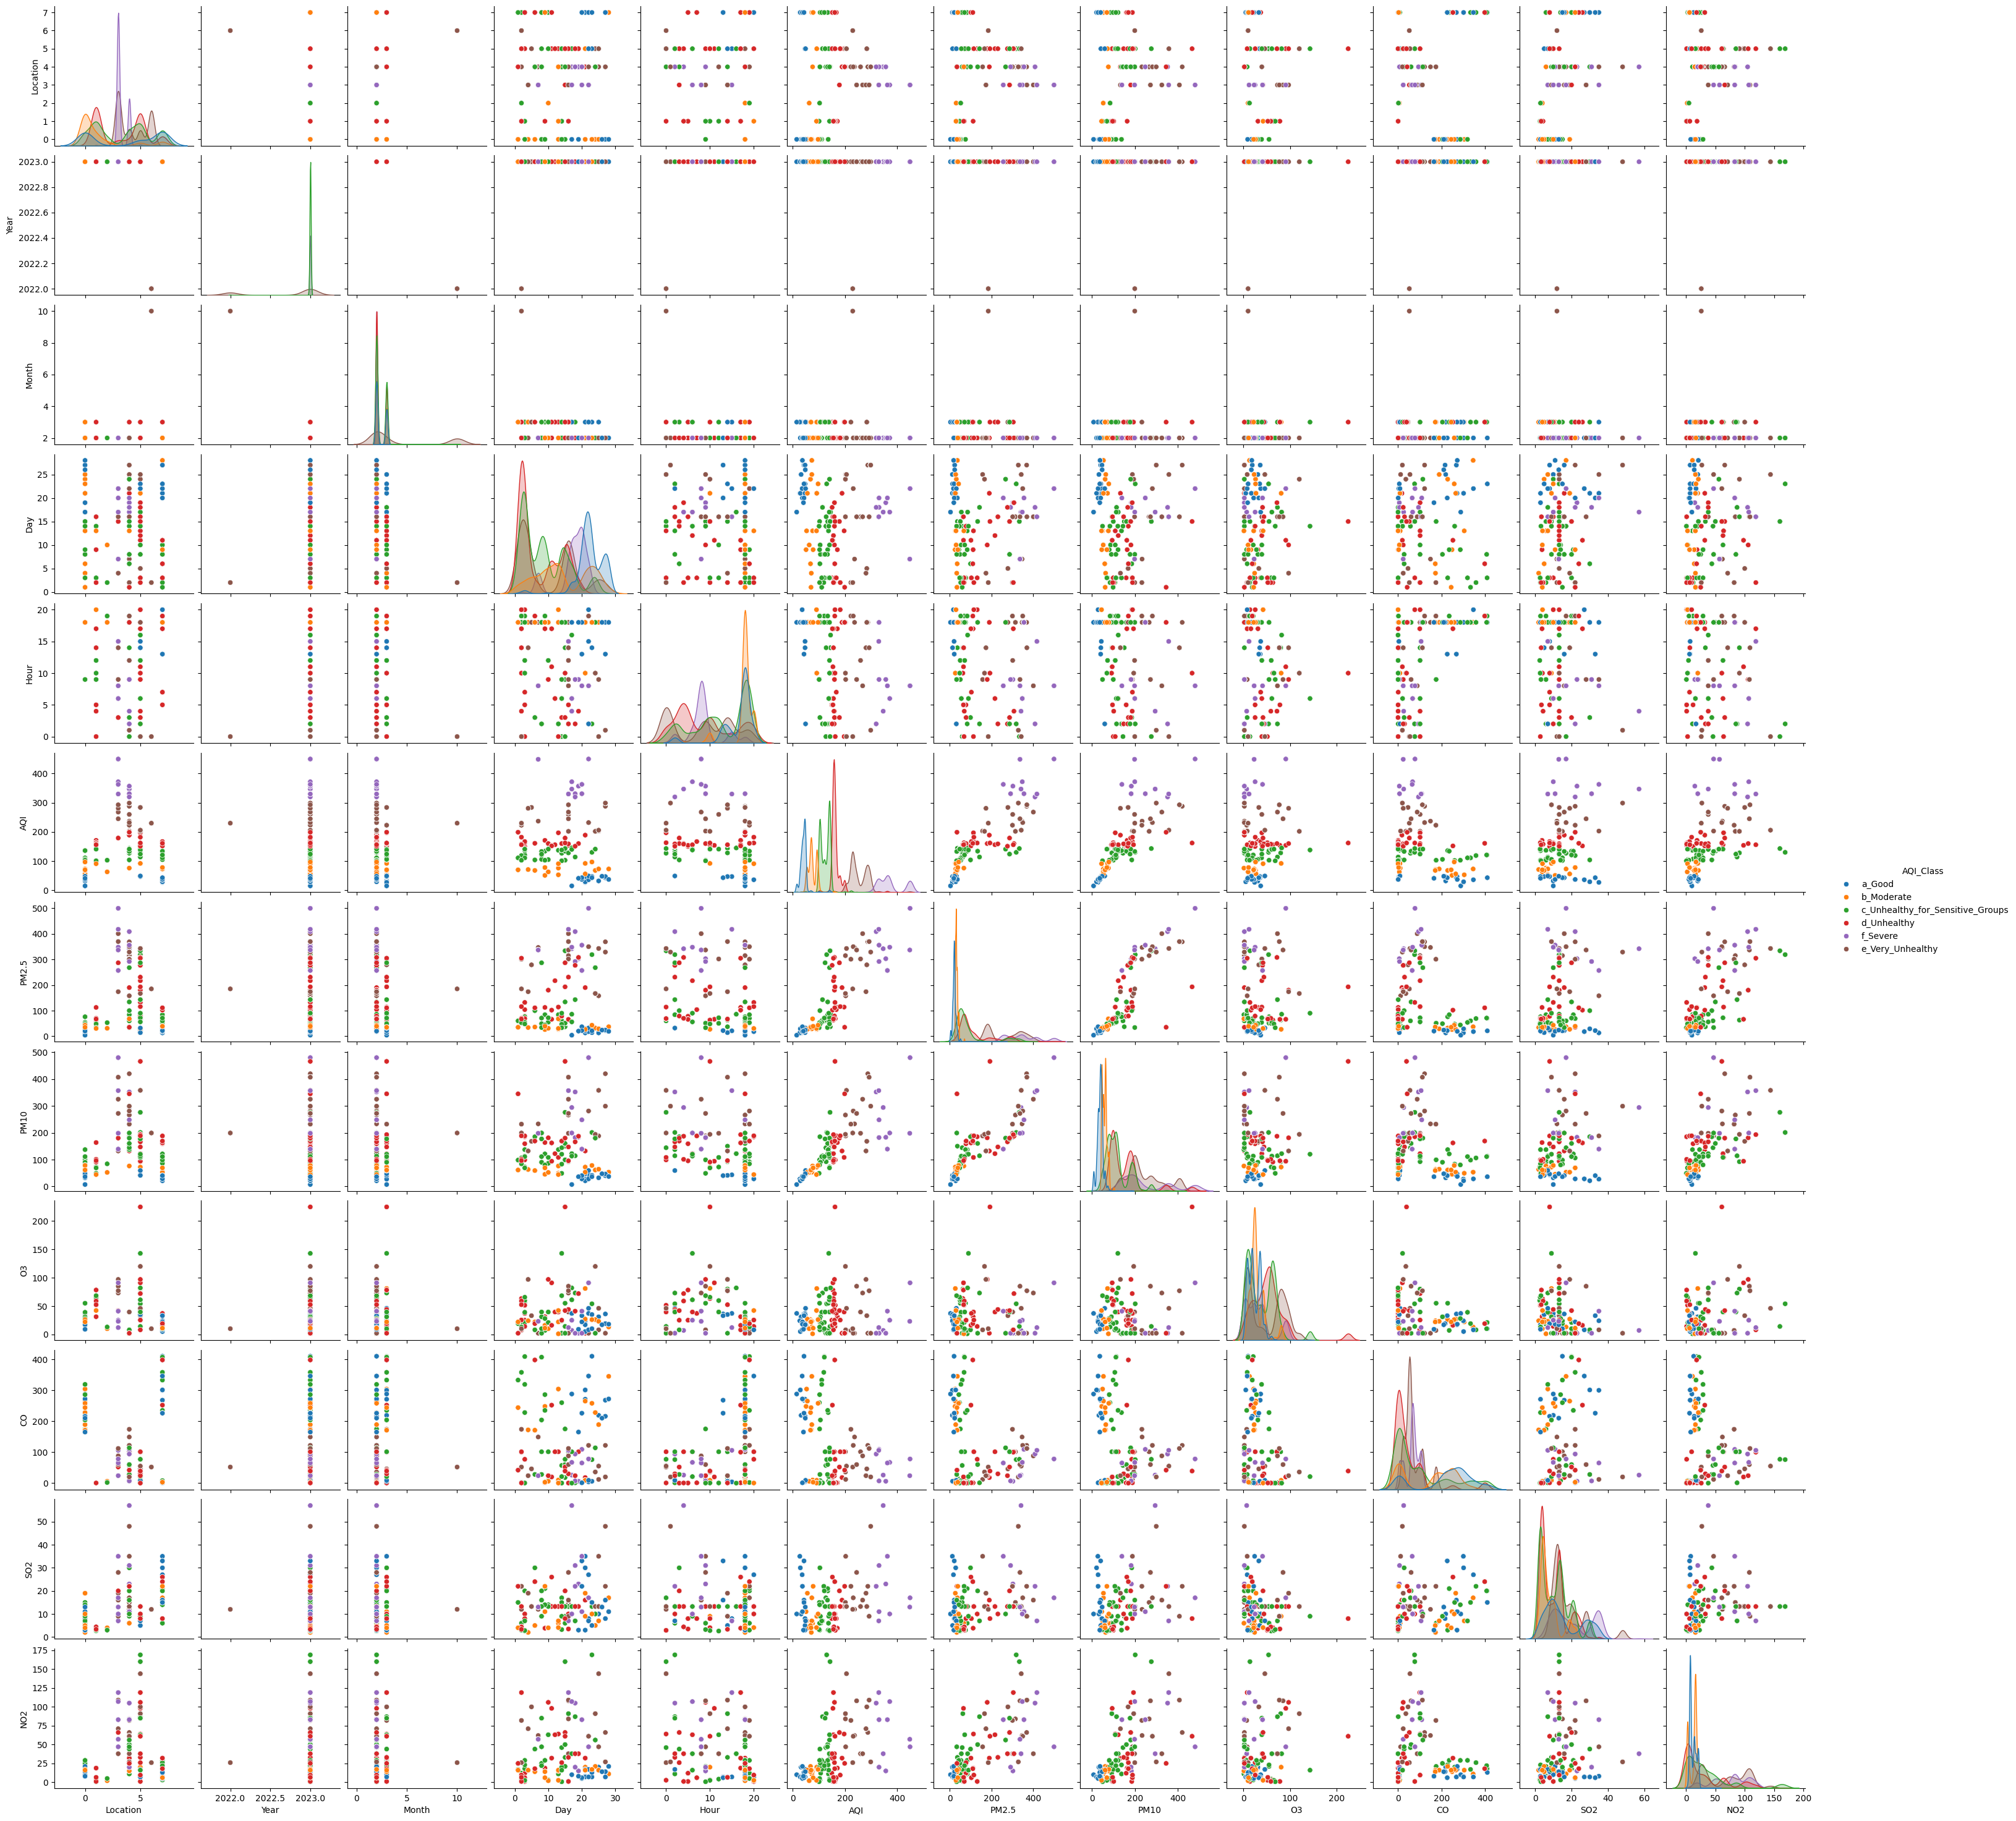

In [33]:
sns.pairplot(dataframe, hue="AQI_Class")
plt.show()

<b>Class Distribution</b>

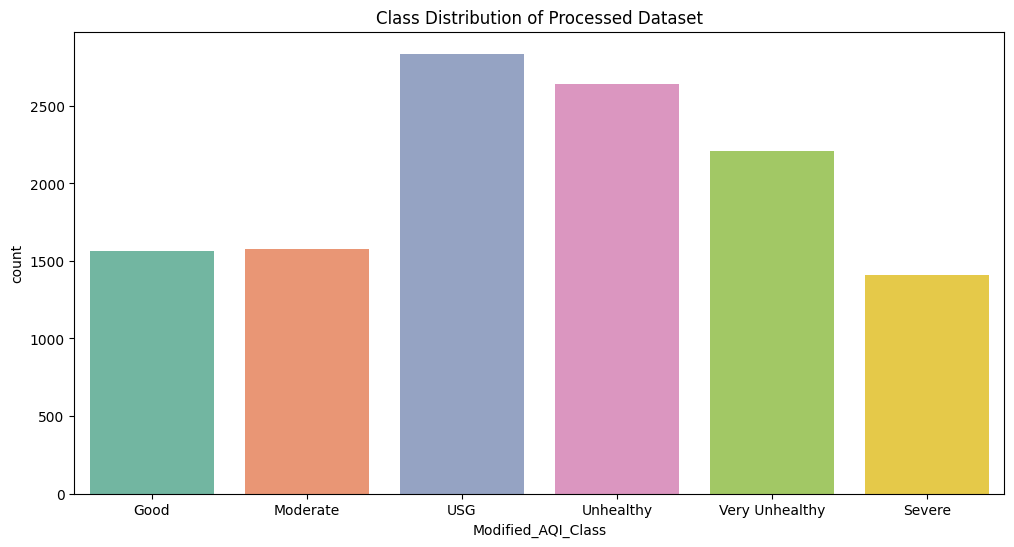

In [34]:
# Define a mapping dictionary to map the old labels to the new labels
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG', 
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
dataframe['Modified_AQI_Class'] = dataframe['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Processed Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=dataframe,x='Modified_AQI_Class', order=custom_order, palette='Set2')

dataframe = dataframe.drop(columns=['Modified_AQI_Class'])

<h3>Step 4: Save processed dataframe</h3>

Export processed dataframe in order to use it for created models.

In [35]:
dataframe.to_csv('../datasets/processed_data.csv', index=False, encoding='utf-8')